In [801]:
#Importing libraries

# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

# Importing Pandas and NumPy
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import xticks

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics


import statsmodels.api as sm

%matplotlib inline

In [802]:
# Reading the data set
df = pd.read_csv('Leads.csv')
df.head(10)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
5,2058ef08-2858-443e-a01f-a9237db2f5ce,660680,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,NaN,NaN,01.High,02.Medium,17.0,15.0,No,No,Modified
6,9fae7df4-169d-489b-afe4-0f3d752542ed,660673,Landing Page Submission,Google,No,No,1,2.0,1640,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,No,Modified
7,20ef72a2-fb3b-45e0-924e-551c5fa59095,660664,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
8,cfa0128c-a0da-4656-9d47-0aa4e67bf690,660624,Landing Page Submission,Direct Traffic,No,No,0,2.0,71,2.0,...,No,NaN,Thane & Outskirts,02.Medium,02.Medium,14.0,14.0,No,Yes,Email Opened
9,af465dfc-7204-4130-9e05-33231863c4b5,660616,API,Google,No,No,0,4.0,58,4.0,...,No,NaN,Mumbai,02.Medium,02.Medium,13.0,16.0,No,No,Email Opened


In [744]:
df.shape

(9240, 36)

In [745]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 36 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Number                                    9240 non-null   int64  
 1   Lead Origin                                    9240 non-null   object 
 2   Lead Source                                    9204 non-null   object 
 3   Do Not Email                                   9240 non-null   object 
 4   Do Not Call                                    9240 non-null   object 
 5   Converted                                      9240 non-null   int64  
 6   TotalVisits                                    9103 non-null   float64
 7   Total Time Spent on Website                    9240 non-null   int64  
 8   Page Views Per Visit                           9103 non-null   float64
 9   Last Activity                                  9137 

In [746]:
# Checking the missing values in each column
# Checking the missing values
df.isna().sum(axis=0)

Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums          

In [747]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


# Cleaning the dataset

Dropping the column prospect ID as it is of no use

In [748]:
# Dropping Prospect ID column
df.drop('Prospect ID', axis = 1, inplace = True)

KeyError: "['Prospect ID'] not found in axis"

There are columns with value 'Select'- Specialization, How did you hear about X Education, Lead Profile, and City. 
It is equivalent to Null as it does not holds any meaning for these columns. So replacing 'Select' with NaN.

In [641]:
df = df.replace('Select', np.nan)
df.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,...,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,...,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [642]:
#Finding the null percentage for all the columns:
round(100*(df.isnull().sum()/len(dataset.index)), 2)

Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

We drop columns having null values of more than 70%. This implies we will be dropping the column 'Lead Profile' which anyways is not important from our business aspect, another column that will get dropped is 'How did you hear about X Education'. 

In [643]:
df1= df.loc[:, round(100*(df.isnull().sum()/len(df.index)), 2) < 70]
df1.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Update me on Supply Chain Content,Get updates on DM Content,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,...,No,No,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,...,No,No,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,...,No,No,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,...,No,No,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,...,No,No,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [644]:
#Finding the null percentage for all the columns of the new dataframe.After dropping missing value columns
round(100*(df1.isnull().sum()/len(df1.index)), 2)

Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [645]:
# The next column with highest null value is 'Lead Quality'
df1['Lead Quality'].describe()

count         4473
unique           5
top       Might be
freq          1560
Name: Lead Quality, dtype: object

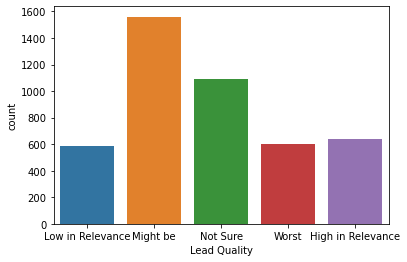

In [646]:
# So there are 5 unique counts in the column
sns.countplot(df1['Lead Quality'])
plt.show()

In [647]:
# As the rating is based on the intuition of the employee based omn how the communication went. 
# Let's find out mode of this vaiable
df1['Lead Quality'].mode()

0    Might be
dtype: object

In [648]:
# Thus replacing null values with 'Might be' as we do not want to lose any potential customers and checking the missing value of the column
df1['Lead Quality'] = df1['Lead Quality'].replace(np.nan, 'Might  be')
df1['Lead Quality'].isnull().sum()

0

Asymmetrique Activity Index, Asymmetrique Profile Index, Asymmetrique Activity Score, Asymmetrique Profile Score are defined as an index and score assigned to each customer based on their activity and their profile

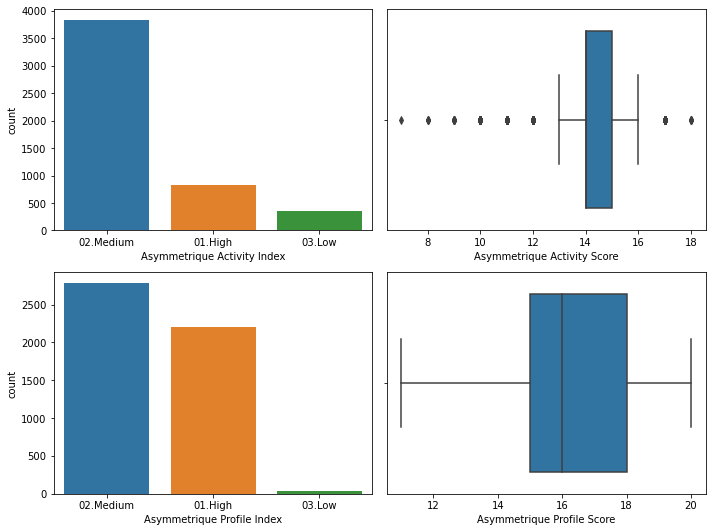

In [649]:
# Visualizing the above mentioned variables to check if they are significant for our model
fig, axs = plt.subplots(2,2, figsize = (10,7.5))
plt1 = sns.countplot(df1['Asymmetrique Activity Index'], ax = axs[0,0])
plt2 = sns.boxplot(df1['Asymmetrique Activity Score'], ax = axs[0,1])
plt3 = sns.countplot(df1['Asymmetrique Profile Index'], ax = axs[1,0])
plt4 = sns.boxplot(df1['Asymmetrique Profile Score'], ax = axs[1,1])
plt.tight_layout()

In [650]:
#We are not getting any important business insight from the above variable hence we are dropping them
df2= df1.copy()
df2 = df2.drop(['Asymmetrique Activity Index','Asymmetrique Activity Score',
                    'Asymmetrique Profile Index','Asymmetrique Profile Score'],1)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 30 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Number                                    9240 non-null   int64  
 1   Lead Origin                                    9240 non-null   object 
 2   Lead Source                                    9204 non-null   object 
 3   Do Not Email                                   9240 non-null   object 
 4   Do Not Call                                    9240 non-null   object 
 5   Converted                                      9240 non-null   int64  
 6   TotalVisits                                    9103 non-null   float64
 7   Total Time Spent on Website                    9240 non-null   int64  
 8   Page Views Per Visit                           9103 non-null   float64
 9   Last Activity                                  9137 

In [651]:
# Calculating the percentage of null values
round(100*(df2.isnull().sum()/len(df2.index)), 2)

Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [652]:
#Using skew() function to find the skewness in data 
round(df2.skew(skipna=True),2)

Lead Number                     0.14
Converted                       0.47
TotalVisits                    19.91
Total Time Spent on Website     0.96
Page Views Per Visit            2.87
dtype: float64

From the above analysis we can see that **TotalVisits** are highly skewed because the skewness is greater than +1

In [653]:
df2.City.describe()

count       5571
unique         6
top       Mumbai
freq        3222
Name: City, dtype: object

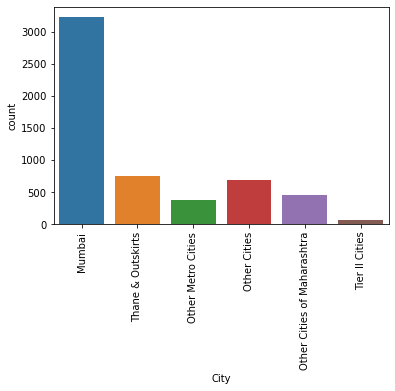

In [654]:
# Plot the bar chart to see the distribution of city
sns.countplot(df2.City)
xticks(rotation = 90)
plt.show()

In [655]:
# As the mode of the variable is Mumbai. So we will impute Mumbai for NaN values.
df2['City'] = df2['City'].replace(np.nan, 'Mumbai')
round(100*(df2.isnull().sum()/len(df2.index)), 2)

Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

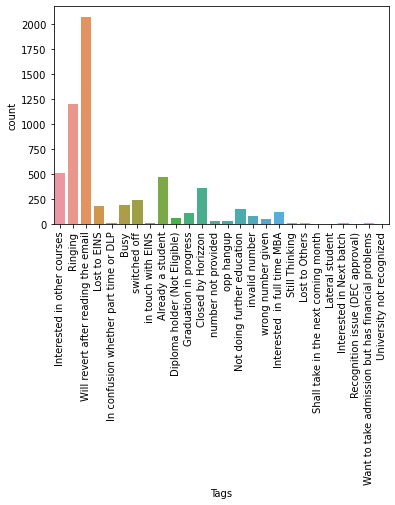

In [656]:
# The next column with highest NaN  values is 'Tags'
sns.countplot(df2.Tags)
xticks(rotation=90)
plt.show()

In [657]:
df2.Tags.describe()

count                                    5887
unique                                     26
top       Will revert after reading the email
freq                                     2072
Name: Tags, dtype: object

In [658]:
# So here we shall impute with the value 'Will revert after reading the email' as it is on the top
df2['Tags'] = df2['Tags'].replace(np.nan, 'Will revert after reading the email')
round(100*(df2.isnull().sum()/len(df2.index)), 2)

Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

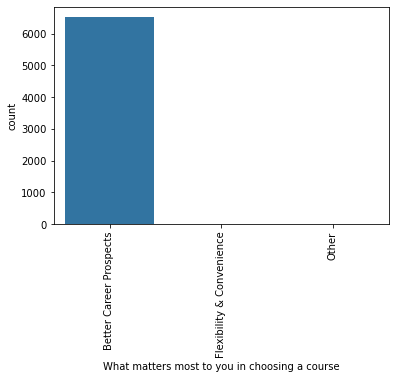

In [659]:
#'What matters most to you in choosing a course'is the next column with highest NaN values 
sns.countplot(df2['What matters most to you in choosing a course'])
xticks(rotation=90)
plt.show()

In [660]:
df2['What matters most to you in choosing a course'].describe()

count                        6531
unique                          3
top       Better Career Prospects
freq                         6528
Name: What matters most to you in choosing a course, dtype: object

In [661]:
df2['What matters most to you in choosing a course'] = df2['What matters most to you in choosing a course'].replace(np.nan, 'Better Career Prospects')

In [662]:
round(100*(df2.isnull().sum()/len(df2.index)), 2)

Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course     0.00
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

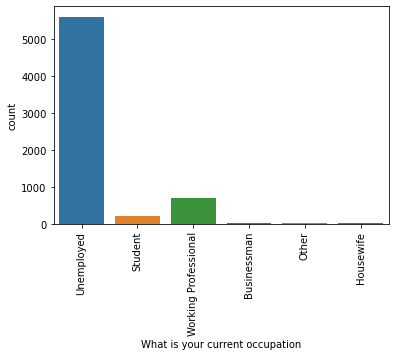

In [663]:
# The next column with highest NaN values is 'What is your current occupation'
sns.countplot(df2['What is your current occupation'])
xticks(rotation=90)
plt.show()

In [664]:
df2['What is your current occupation'].describe()

count           6550
unique             6
top       Unemployed
freq            5600
Name: What is your current occupation, dtype: object

As 85% of the column is filled with unemployed so to replace NaN value we will use "unemployed"

In [665]:
df2['What is your current occupation'] = df2['What is your current occupation'].replace(np.nan, 'Unemployed')

In [666]:
round(100*(df2.isnull().sum()/len(df2.index)), 2)

Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                   0.00
What matters most to you in choosing a course     0.00
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [667]:
df2 = df2.replace('Select', np.nan)

In [668]:
round(100*(df2.isnull().sum()/len(df2.index)), 2)

Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                   0.00
What matters most to you in choosing a course     0.00
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

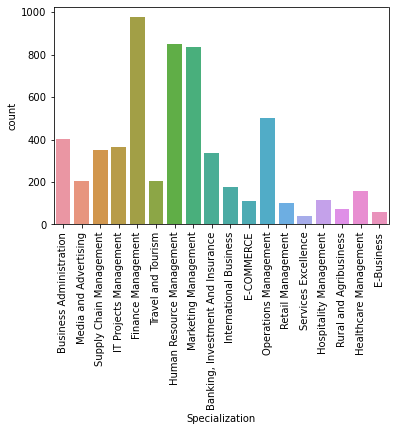

In [669]:
# Next highest null values is specialization
sns.countplot(df2.Specialization)
xticks(rotation=90)
plt.show()

In [670]:
df2.Specialization.describe()

count                   5860
unique                    18
top       Finance Management
freq                     976
Name: Specialization, dtype: object

Now here there are few scenarios that we need to consider: Firstly, maybe the customer has not entered any Specialization because it might not be available on the list. Secondly, the customer may be a student having no Specialization. So we shall impute 'Others' which means that the customer has not chosen any given options.

In [671]:
df2['Specialization'] = df2['Specialization'].replace(np.nan, 'Others')

In [672]:
# The next column with highest NaN values is 'Country'.
df2.Country.describe()

count      6779
unique       38
top       India
freq       6492
Name: Country, dtype: object

In [673]:
#As India has the highest frequency we would impute 'India' for NaN values.

df2['Country'] = df2['Country'].replace(np.nan, 'India')

In [674]:
round(100*(df2.isnull().sum()/len(df2.index)), 2)

Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                   

# Exploratory Data Analysis:

In [675]:
# Converted by definition implies the target variable. Indicates whether a lead has been successfully converted or not.
Converted = (sum(df2['Converted'])/len(df2['Converted'].index))*100
Converted

38.53896103896104

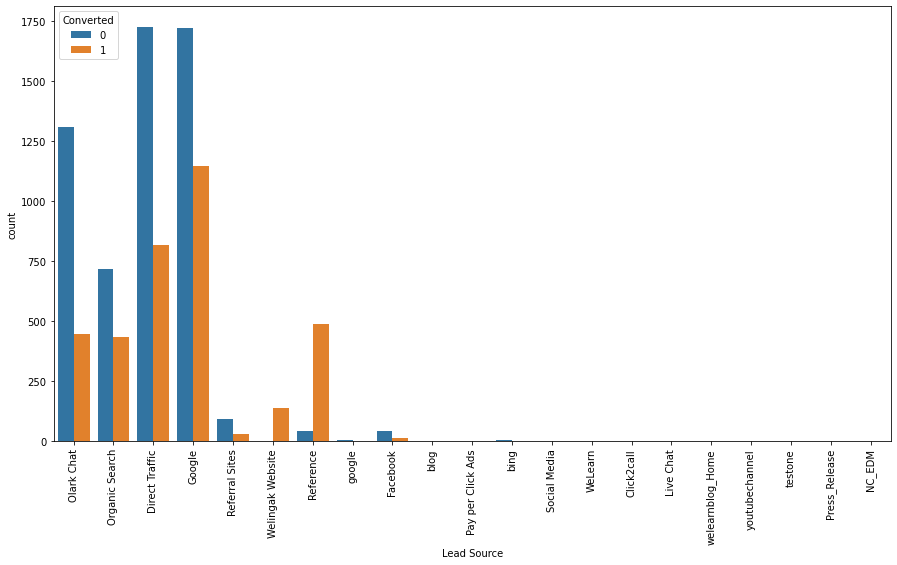

In [676]:
# Lead Source- The source of the lead. Includes Google, Organic Search, Olark Chat, etc.
fig, axs = plt.subplots(figsize = (15,8))
sns.countplot(x = "Lead Source", hue = "Converted", data = df2)
xticks(rotation = 90)
plt.show()

In [677]:
df2['Lead Source'] = df2['Lead Source'].fillna('Null')  # For nan values we can replace it as Null value

In [678]:
df2['Lead Source'].unique()

array(['Olark Chat', 'Organic Search', 'Direct Traffic', 'Google',
       'Referral Sites', 'Welingak Website', 'Reference', 'google',
       'Facebook', 'Null', 'blog', 'Pay per Click Ads', 'bing',
       'Social Media', 'WeLearn', 'Click2call', 'Live Chat',
       'welearnblog_Home', 'youtubechannel', 'testone', 'Press_Release',
       'NC_EDM'], dtype=object)

As can be seen 'Google' and 'google' both are same. So we need to change them

In [679]:
# Modifying 'google' to 'Google' and also replacing all other categories having low or no conversion into other platforms.
df2['Lead Source'] = df2['Lead Source'].replace(['google'], 'Google')
df2['Lead Source'] = df2['Lead Source'].replace([ 'blog', 'Pay per Click Ads', 'bing', 'Social Media', 'WeLearn', 
                                                  'Click2call', 'Live Chat','welearnblog_Home', 'youtubechannel', 'testone', 
                                                   'Press_Release', 'NC_EDM','Null'], 'Other_Platforms')

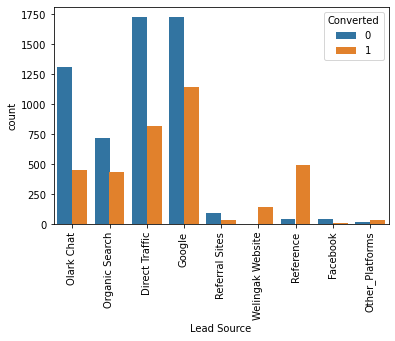

In [680]:
# Checking
sns.countplot(x = "Lead Source", hue = "Converted", data = df2)
xticks(rotation = 90)
plt.show()


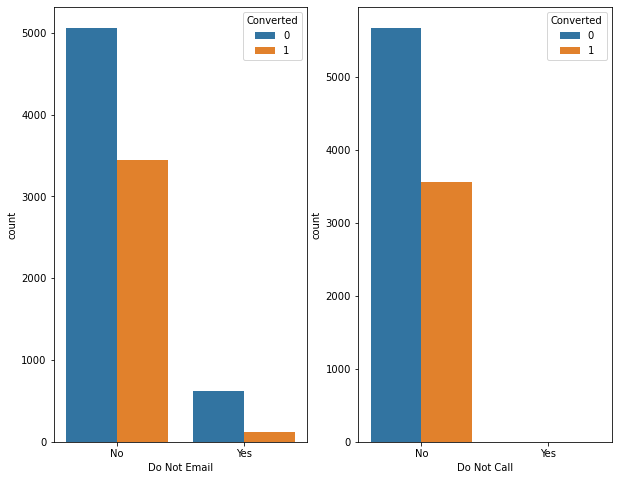

In [681]:
fig, axs = plt.subplots(1,2,figsize = (10,8))
sns.countplot(x = "Do Not Email", hue = "Converted", data = df2, ax = axs[0])
sns.countplot(x = "Do Not Call", hue = "Converted", data = df2, ax = axs[1])
plt.show()

Dealing with outliers

In [682]:
cols = ['Total Time Spent on Website', 'Page Views Per Visit','TotalVisits']

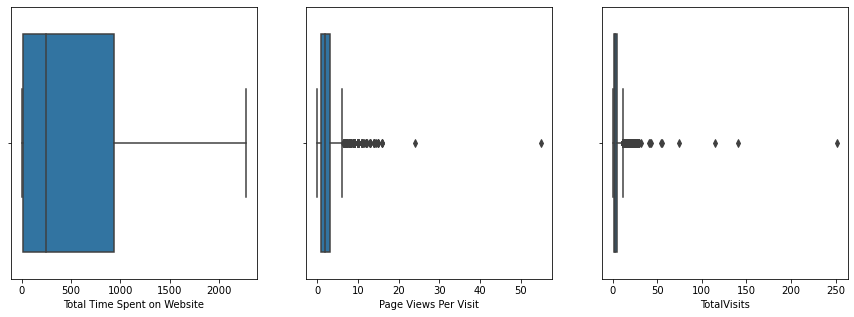

In [683]:
# Plotting for outliers
plt.figure(figsize = (15, 5))
for i, col in enumerate(cols):
    plt.subplot(1,3, i+1)
    sns.boxplot(df2[col])
plt.show()

In [684]:
# Removing outliers using 1.5 Inter quartile Range method
for col in cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)

    iqr = q3 - q1

    lower_bound = q1 -(1.5 * iqr) 
    upper_bound = q3 +(1.5 * iqr)

    df2 = df2.loc[(df[col] >= lower_bound) & (df2[col] <= upper_bound)]

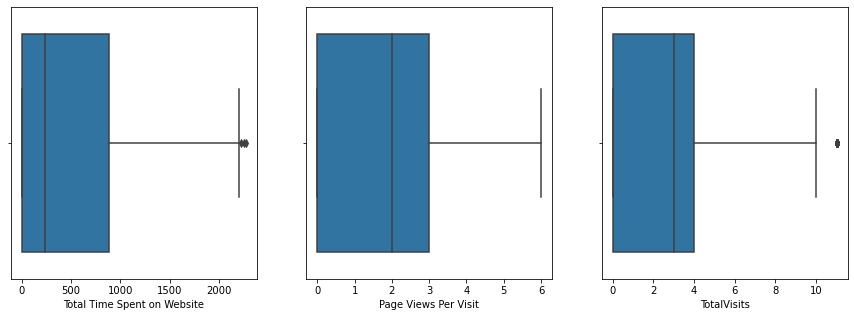

In [685]:
# Plotting for outliers
plt.figure(figsize = (15, 5))
for i, col in enumerate(cols):
    plt.subplot(1,3, i+1)
    sns.boxplot(df2[col])
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'Page Visited on Website'),
  Text(1, 0, 'Email Opened'),
  Text(2, 0, 'Unreachable'),
  Text(3, 0, 'Converted to Lead'),
  Text(4, 0, 'Olark Chat Conversation'),
  Text(5, 0, 'Email Bounced'),
  Text(6, 0, 'Email Link Clicked'),
  Text(7, 0, 'Form Submitted on Website'),
  Text(8, 0, 'Had a Phone Conversation'),
  Text(9, 0, 'View in browser link Clicked'),
  Text(10, 0, 'Unsubscribed'),
  Text(11, 0, 'SMS Sent'),
  Text(12, 0, 'Visited Booth in Tradeshow'),
  Text(13, 0, 'Approached upfront'),
  Text(14, 0, 'Resubscribed to emails'),
  Text(15, 0, 'Email Received'),
  Text(16, 0, 'Email Marked Spam')])

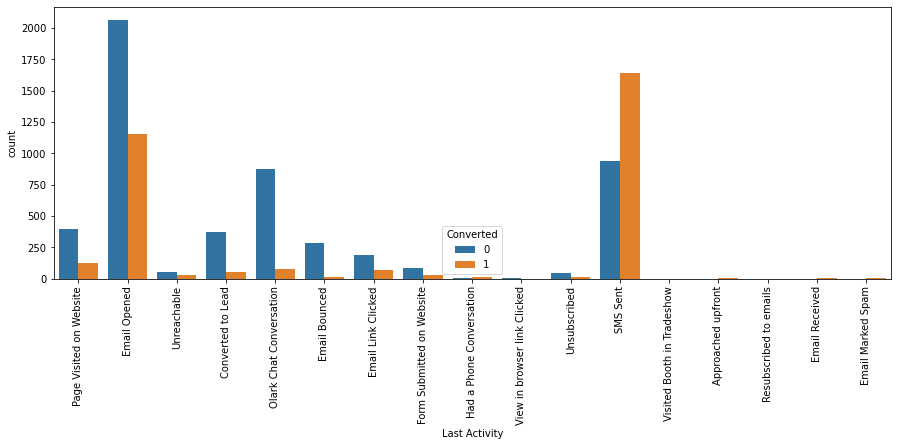

In [686]:
# Last activity performed by the customer. 
fig, axs = plt.subplots(figsize = (15,5))
sns.countplot(x = "Last Activity", hue = "Converted", data = df2)
xticks(rotation = 90)

In [687]:
#The categories - 'Had a Phone Conversation', 'View in browser link Clicked', 'Visited Booth in Tradeshow', 
#'Approached upfront','Resubscribed to emails','Email Received', 'Email Marked Spam' so we group them in Other_Activity.
df2['Last Activity'] = df2['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked', 
                                                    'Visited Booth in Tradeshow', 'Approached upfront',
                                                    'Resubscribed to emails','Email Received', 'Email Marked Spam'], 
                                                     'Other_Activity')

In [688]:
df2['Last Activity'].unique()

array(['Page Visited on Website', 'Email Opened', 'Unreachable',
       'Converted to Lead', 'Olark Chat Conversation', 'Email Bounced',
       'Email Link Clicked', 'Form Submitted on Website',
       'Other_Activity', 'Unsubscribed', 'SMS Sent'], dtype=object)

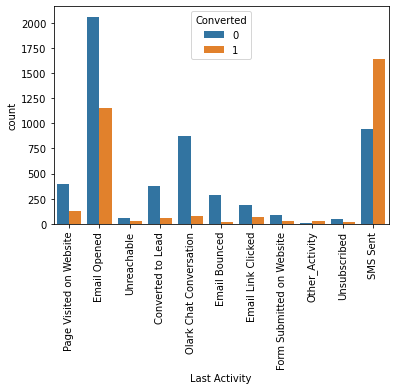

In [689]:
sns.countplot(x = "Last Activity", hue = "Converted", data = df2)
xticks(rotation = 90)
plt.show()

Conversion rate much higher if SMS sent is used 

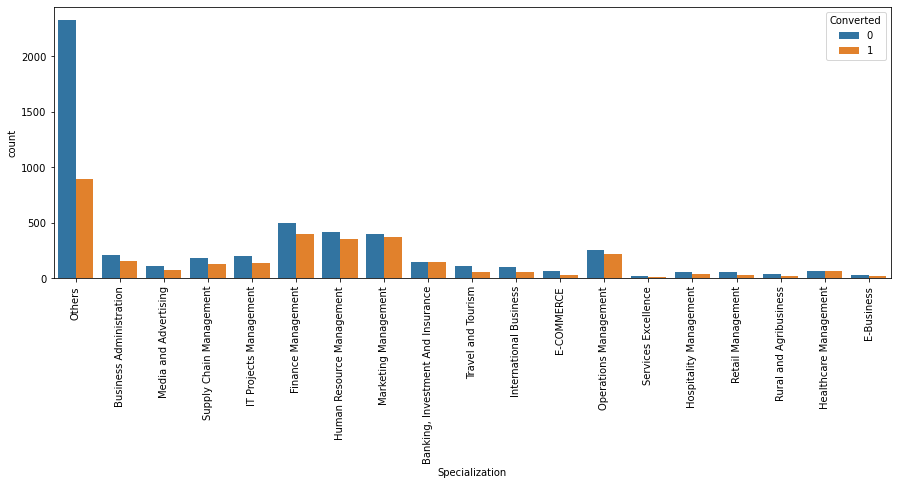

In [690]:
# Visualizing the Specialization column
fig, axs = plt.subplots(figsize = (15,5))
sns.countplot(x = "Specialization", hue = "Converted", data = df2)
xticks(rotation = 90)
plt.show()

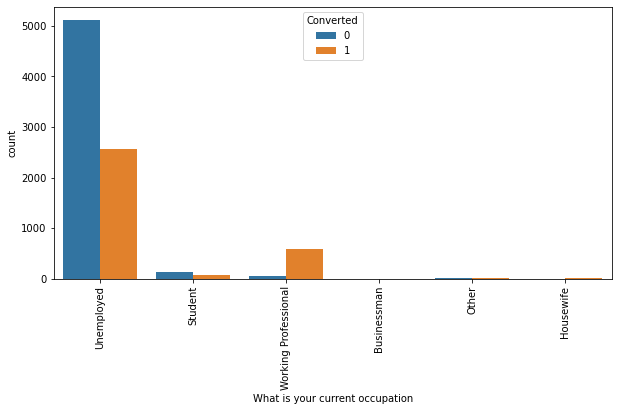

In [691]:
#Visualizing the Occupation column
fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x = "What is your current occupation", hue = "Converted", data = df2)
xticks(rotation = 90)
plt.show()

The conversion rate is much higher when someone is unemployed following by working professional and students

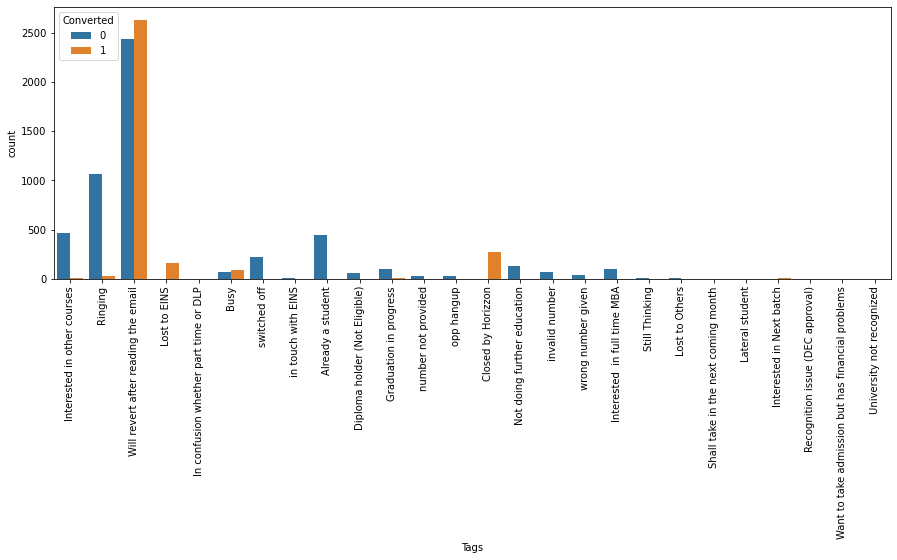

In [692]:
# Visualization for Tags
fig, axs = plt.subplots(figsize = (15,5))
sns.countplot(x = "Tags", hue = "Converted", data = df2)
xticks(rotation = 90)
plt.show()

In [693]:
df2['Tags'] = df2['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized'], 'Other_Tags')
df2['Tags'].unique()

array(['Interested in other courses', 'Ringing',
       'Will revert after reading the email', 'Lost to EINS',
       'Other_Tags', 'Busy', 'switched off', 'Already a student',
       'Closed by Horizzon', 'Not doing further education',
       'invalid number', 'wrong number given',
       'Interested  in full time MBA'], dtype=object)

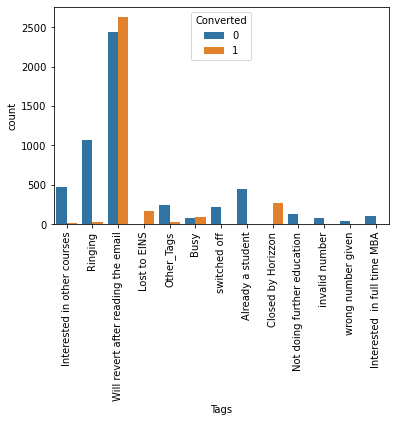

In [694]:
sns.countplot(x = "Tags", hue = "Converted", data = df2)
xticks(rotation = 90)
plt.show()


In [695]:
df2.Country.describe()

count      8542
unique       38
top       India
freq       8274
Name: Country, dtype: object

In [696]:
df2.Magazine.describe()

count     8542
unique       1
top         No
freq      8542
Name: Magazine, dtype: object

In [697]:
df2.Search.describe()

count     8542
unique       2
top         No
freq      8534
Name: Search, dtype: object

In [698]:
df2['Newspaper Article'].describe()

count     8542
unique       1
top         No
freq      8542
Name: Newspaper Article, dtype: object

In [699]:
df2['X Education Forums'].describe()

count     8542
unique       1
top         No
freq      8542
Name: X Education Forums, dtype: object

In [700]:
df2['Newspaper'].describe()

count     8542
unique       2
top         No
freq      8541
Name: Newspaper, dtype: object

In [701]:
df2['Digital Advertisement'].describe()

count     8542
unique       2
top         No
freq      8540
Name: Digital Advertisement, dtype: object

In [702]:
df2['Receive More Updates About Our Courses'].describe()

count     8542
unique       1
top         No
freq      8542
Name: Receive More Updates About Our Courses, dtype: object

In [703]:
df2['Through Recommendations'].describe()

count     8542
unique       2
top         No
freq      8538
Name: Through Recommendations, dtype: object

In [704]:
df2['Update me on Supply Chain Content'].describe()

count     8542
unique       1
top         No
freq      8542
Name: Update me on Supply Chain Content, dtype: object

In [705]:
df2['Get updates on DM Content'].describe()

count     8542
unique       1
top         No
freq      8542
Name: Get updates on DM Content, dtype: object

In [706]:
df2['I agree to pay the amount through cheque'].describe()

count     8542
unique       1
top         No
freq      8542
Name: I agree to pay the amount through cheque, dtype: object

In [707]:
df2['A free copy of Mastering The Interview'].describe() 

count     8542
unique       2
top         No
freq      5972
Name: A free copy of Mastering The Interview, dtype: object

No inference can be drawn from above describles variables. As majority of the columnsare frequenty filled with no.

In [708]:
df2['Last Notable Activity'].describe()

count         8542
unique          16
top       Modified
freq          3122
Name: Last Notable Activity, dtype: object

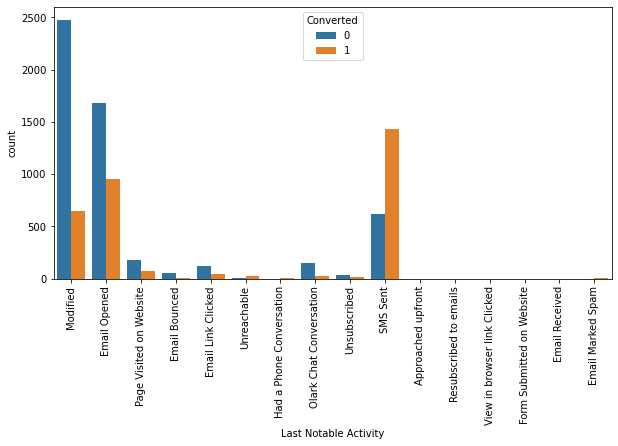

In [709]:
# Visualizing the column.
fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x = "Last Notable Activity", hue = "Converted", data = df2)
xticks(rotation = 90)
plt.show()

In [710]:
# Let's keep considerable last activities and combine rest others to "Other_Activity"
df2['Last Notable Activity'] = df2['Last Notable Activity'].replace(['Approached upfront',
                             'Resubscribed to emails', 'View in browser link Clicked',
                              'Form Submitted on Website', 'Email Received', 'Email Marked Spam'], 
                                                                  'Other_Last_Notable_Activity')

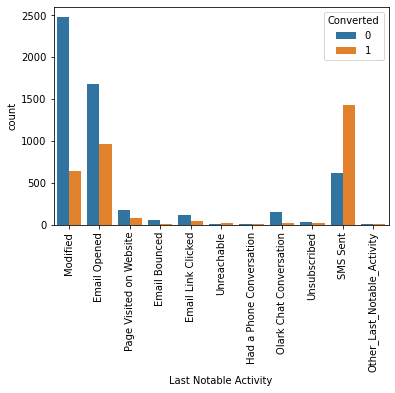

In [711]:
# Again making visualization for Last notable activity
sns.countplot(x = "Last Notable Activity", hue = "Converted", data = df2)
xticks(rotation = 90)
plt.show()

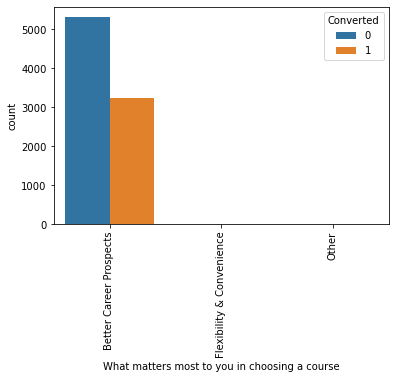

In [712]:
# An option selected by the customer indicating what is their main motto behind doing this course.

sns.countplot(x = "What matters most to you in choosing a course", hue = "Converted", data = df2)
xticks(rotation = 90)
plt.show()

Even though students have choosen Better career prospects as their option still the conversion is less

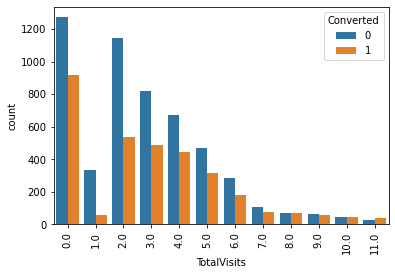

In [713]:
# The total number of visits made by the customer on the website.

sns.countplot(x = "TotalVisits", hue = "Converted", data = df2)
xticks(rotation = 90)
plt.show()

 Those who have not visited site have higher conversion rate compare to those who have visited. 
More the visits lesser the conversion.

In [714]:
# We will drop all those columns that are unwanted from our business perspective and are unable to provide any siginificant insight

new_df= df2.copy()
new_df= new_df.drop(['What matters most to you in choosing a course','Search','Magazine','Newspaper Article',
                     'X Education Forums','Newspaper','Digital Advertisement','Through Recommendations',
                     'Receive More Updates About Our Courses','Update me on Supply Chain Content',
                     'Get updates on DM Content','I agree to pay the amount through cheque',
                     'A free copy of Mastering The Interview'],1)
new_df.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,Tags,Lead Quality,City,Last Notable Activity
0,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,India,Others,Unemployed,Interested in other courses,Low in Relevance,Mumbai,Modified
1,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Others,Unemployed,Ringing,Might be,Mumbai,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Will revert after reading the email,Might be,Mumbai,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Ringing,Not Sure,Mumbai,Modified
4,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Others,Unemployed,Will revert after reading the email,Might be,Mumbai,Modified


In [715]:
new_df.shape

(8542, 17)

In [716]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8542 entries, 0 to 9239
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Lead Number                      8542 non-null   int64  
 1   Lead Origin                      8542 non-null   object 
 2   Lead Source                      8542 non-null   object 
 3   Do Not Email                     8542 non-null   object 
 4   Do Not Call                      8542 non-null   object 
 5   Converted                        8542 non-null   int64  
 6   TotalVisits                      8542 non-null   float64
 7   Total Time Spent on Website      8542 non-null   int64  
 8   Page Views Per Visit             8542 non-null   float64
 9   Last Activity                    8542 non-null   object 
 10  Country                          8542 non-null   object 
 11  Specialization                   8542 non-null   object 
 12  What is your current

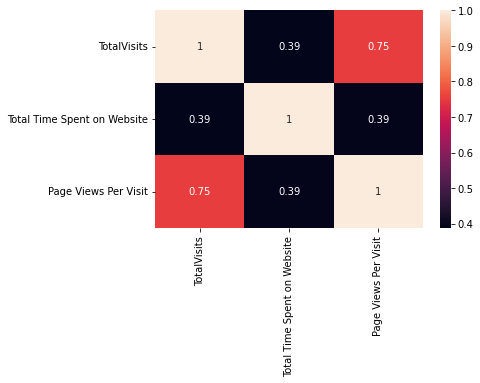

In [717]:
# Now we will plot a heatmap to verify the correlation of the variables.
sns.heatmap(new_df.drop(['Lead Number', 'Converted'], axis = 1).corr(),annot=True)
plt.show()

In [718]:
# Creating dummy variables. Converting binary variables yes-1 and no-0
yes_no_cols = ['Do Not Email', 'Do Not Call']

def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

new_df[yes_no_cols] = new_df[yes_no_cols].apply(binary_map) 
new_df.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,Tags,Lead Quality,City,Last Notable Activity
0,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,India,Others,Unemployed,Interested in other courses,Low in Relevance,Mumbai,Modified
1,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,India,Others,Unemployed,Ringing,Might be,Mumbai,Email Opened
2,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Will revert after reading the email,Might be,Mumbai,Email Opened
3,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Ringing,Not Sure,Mumbai,Modified
4,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,India,Others,Unemployed,Will revert after reading the email,Might be,Mumbai,Modified


In [719]:
# percentage rows retained
f'{round(100 * (new_df.shape[0] / dataset.shape[0]))} % row is retained after missing value and outliers treatment.'

'92 % row is retained after missing value and outliers treatment.'

In [720]:
dummies_1 = ['Lead Origin', 'Lead Source', 'Last Activity', 'Country', 'Specialization',
                       'What is your current occupation','Lead Quality','Tags', 'City', 'Last Notable Activity']

In [721]:
# creating dummy columns
dummies = pd.get_dummies(new_df[dummies_1], drop_first=True)
new_df = pd.concat([new_df, dummies], axis = 1)

In [722]:
new_df.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other_Last_Notable_Activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
0,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,...,0,0,0,1,0,0,0,0,0,0
1,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,...,0,1,0,0,0,0,0,0,0,0
2,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,...,0,1,0,0,0,0,0,0,0,0
3,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,...,0,0,0,1,0,0,0,0,0,0
4,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,...,0,0,0,1,0,0,0,0,0,0


In [723]:
# dropping the original columns
new_df.drop(dummies_1, axis = 1, inplace = True)
new_df.shape

(8542, 120)

In [724]:
new_df.corr()

,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,...,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other_Last_Notable_Activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
Lead Number,1.000000,-0.096085,0.012584,0.026270,0.055848,0.022573,0.071921,-0.063554,0.022944,0.077607,...,0.019033,0.078713,-0.001571,0.073443,-0.033892,-0.007954,0.002692,-0.163461,0.009234,-0.004930
Do Not Email,-0.096085,1.000000,-0.004432,-0.132891,-0.022285,-0.043759,0.009380,0.095089,-0.019947,-0.017193,...,-0.036918,-0.185892,-0.010399,0.115921,-0.010955,0.022329,0.033694,-0.025196,-0.009787,0.251283
Do Not Call,0.012584,-0.004432,1.000000,0.019615,0.010615,0.007646,-0.005335,-0.015970,0.025655,-0.000909,...,-0.002121,-0.010224,-0.000550,0.020164,-0.002213,-0.000438,-0.002641,-0.008597,-0.000909,-0.001114
Converted,0.026270,-0.132891,0.019615,1.000000,0.046269,0.342187,-0.005163,-0.041973,0.316501,-0.009593,...,-0.033579,-0.020575,0.039295,-0.268302,-0.075341,0.019836,-0.029468,0.371817,0.039372,-0.013426
TotalVisits,0.055848,-0.022285,0.010615,0.046269,1.000000,0.388308,0.753295,0.477852,-0.299674,-0.068515,...,-0.019273,0.095636,0.022897,-0.156915,-0.067823,0.015665,0.157703,0.032970,0.019240,0.012961
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Last Notable Activity_Other_Last_Notable_Activity,-0.007954,0.022329,-0.000438,0.019836,0.015665,0.009342,0.001988,0.002873,0.008080,-0.001700,...,-0.003969,-0.019133,-0.001028,-0.021735,-0.004142,1.000000,-0.004942,-0.016088,-0.001700,-0.002084
Last Notable Activity_Page Visited on Website,0.002692,0.033694,-0.002641,-0.029468,0.157703,0.022929,0.030707,0.038092,-0.012100,-0.010244,...,-0.023917,-0.115283,-0.006196,-0.130966,-0.024956,-0.004942,1.000000,-0.096937,-0.010244,-0.012558
Last Notable Activity_SMS Sent,-0.163461,-0.025196,-0.008597,0.371817,0.032970,0.132532,0.072559,0.048759,0.129893,-0.028715,...,-0.077860,-0.375296,-0.020172,-0.426349,-0.081242,-0.016088,-0.096937,1.000000,-0.033350,-0.040881
Last Notable Activity_Unreachable,0.009234,-0.009787,-0.000909,0.039372,0.019240,0.009036,0.022866,-0.002532,0.006816,-0.003524,...,-0.008228,-0.039662,-0.002132,-0.045057,-0.008586,-0.001700,-0.010244,-0.033350,1.000000,-0.004320


In [725]:
new_df.set_index('Lead Number', inplace = True)

In [726]:
new_df.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,...,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other_Last_Notable_Activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
Lead Number,,,,,,,,,,,,,,,,,,,,,
660737,0,0,0,0.0,0,0.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
660728,0,0,0,5.0,674,2.5,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
660727,0,0,1,2.0,1532,2.0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
660719,0,0,0,1.0,305,1.0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
660681,0,0,1,2.0,1428,1.0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0


Creating test and train data set 70:30

In [727]:
# Putting feature variable to X
X = new_df.drop(['Converted'], axis=1)

In [728]:
# response variable to y
y = new_df['Converted']
y.head()

Lead Number
660737    0
660728    0
660727    1
660719    0
660681    1
Name: Converted, dtype: int64

In [729]:
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other_Last_Notable_Activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
Lead Number,,,,,,,,,,,,,,,,,,,,,
660737,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
660728,0,0,5.0,674,2.5,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
660727,0,0,2.0,1532,2.0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
660719,0,0,1.0,305,1.0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
660681,0,0,2.0,1428,1.0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [730]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [731]:
# Scaling for continuous variables:

scaler = StandardScaler()

X_train[['Total Time Spent on Website', 'Page Views Per Visit','TotalVisits']] = scaler.fit_transform(X_train[['Total Time Spent on Website', 'Page Views Per Visit',
                                                                                                               'TotalVisits']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other_Last_Notable_Activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
Lead Number,,,,,,,,,,,,,,,,,,,,,
645431,0,0,0.886460,-0.337463,1.783827,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
640120,0,0,-1.145025,-0.860893,-1.254234,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
626872,0,0,-1.145025,-0.860893,-1.254234,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
604384,0,0,0.480163,0.301267,1.176215,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
645291,0,0,-0.332431,-0.857232,-0.039010,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [732]:
conversion_rate = (sum(new_df['Converted'])/len(new_df['Converted'].index))*100
conversion_rate

37.83657223132756

# Building regression model

In [733]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5979
Model:                            GLM   Df Residuals:                     5865
Model Family:                Binomial   Df Model:                          113
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 18 Sep 2022   Deviance:                       54341.
Time:                        23:57:57   Pearson chi2:                 2.66e+18
No. Iterations:                    39                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                -2.152e+14   5.85e+07  -3.68e+06      0.000   -2.15e+14   -2.15e+14
Do Not Email                                         -3.779e+14   4.66e+06   -8.1e+07      0.000   -3.78e+14   -3.78e+14
Do Not Call                                           2.049e+15   6.79e+07   3.02e+07      0.000    2.05e+15    2.05e+15
TotalVisits                                           4.637e+13   1.45e+06    3.2e+07      0.000    4.64e+13    4.64e+13
Total Time Spent on Website                           2.498e+14   1.07e+06   2.34e+08      0.000     2.5e+14     2.5e+14
Page Views Per Visit                                 -6.915e+13   1.63e+06  -4.24e+07      0.000   -6.91e+13   -6.91e+13
Lead Origin_Landing Page Submission                  -2.563e+14   3.62e+06  -7.08e+07      0.000   -2.56e+14   -2.56e+14
Lead Origin_Lead Add Form                            -4.648e+14   2.11e+07   -2.2e+07      0.000   -4.65e+14   -4.65e+14
Lead Origin_Lead Import                               -4.88e+15   6.97e+07  -7.01e+07      0.000   -4.88e+15   -4.88e+15
Lead Source_Facebook                                  4.963e+15   7.14e+07   6.95e+07      0.000    4.96e+15    4.96e+15
Lead Source_Google                                    7.755e+13    2.6e+06   2.99e+07      0.000    7.76e+13    7.76e+13
Lead Source_Olark Chat                               -3.271e+14   4.13e+06  -7.91e+07      0.000   -3.27e+14   -3.27e+14
Lead Source_Organic Search                            7.291e+13   3.52e+06   2.07e+07      0.000    7.29e+13    7.29e+13
Lead Source_Other_Platforms                           9.167e+14   1.76e+07   5.22e+07      0.000    9.17e+14    9.17e+14
Lead Source_Reference                                 9.791e+14   2.14e+07   4.59e+07      0.000    9.79e+14    9.79e+14
Lead Source_Referral Sites                            9.626e+13   8.75e+06    1.1e+07      0.000    9.63e+13    9.63e+13
Lead Source_Welingak Website                           1.37e+15   2.22e+07   6.18e+07      0.000    1.37e+15    1.37e+15
Last Activity_Email Bounced                           4.777e+14   8.16e+06   5.85e+07      0.000    4.78e+14    4.78e+14
Last Activity_Email Link Clicked                      2.583e+14   9.71e+06   2.66e+07      0.000    2.58e+14    2.58e+14
Last Activity_Email Opened                            4.837e+14   5.47e+06   8.85e+07      0.000    4.84e+14    4.84e+14
Last Activity_Form Submitted on Website               2.587e+14   8.47e+06   3.06e+07      0.000    2.59e+14    2.59e+14
Last Activity_Olark Chat Conversation                 7.161e+14   5.35e+06   1.34e+08      0.000    7.16e+14    7.16e+14
Last Activity_Other_Activity                          5.76

In [734]:
# Creating object of LogisticRegression class from sklearn.linear_model
logreg = LogisticRegression()

# running RFE with 15 variables as output using sklearn.feature_selection
rfe = RFE(logreg, 15)             
rfe = rfe.fit(X_train, y_train)

In [735]:
# For each of the columns whether or not it is on top 15. 'True' means it got selected.
rfe.support_

array([ True, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
        True,  True,  True, False, False,  True, False, False,  True,
        True, False,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
        True])

In [736]:
# Feature columns selected by RFE
col = X_train.columns[rfe.support_]

Stats Model

In [737]:
# Adding constant
X_train_sm = sm.add_constant(X_train[col])

# Running sm.GLM
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5979
Model:                            GLM   Df Residuals:                     5963
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1363.5
Date:                Sun, 18 Sep 2022   Deviance:                       2727.1
Time:                        23:58:10   Pearson chi2:                 7.97e+04
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -2.6892      0.227    -11.829      0.000      -3.135      -2.244
Do Not Email                                -1.3781      0.242     -5.703      0.000      -1.852      -0.904
Lead Origin_Lead Add Form                    1.5097      0.450      3.355      0.001       0.628       2.392
Lead Source_Welingak Website                 3.6491      1.114      3.275      0.001       1.465       5.833
Last Activity_Olark Chat Conversation       -1.4204      0.206     -6.882      0.000      -1.825      -1.016
Lead Quality_Might  be                      -4.0241      0.153    -26.328      0.000      -4.324      -3.725
Lead Quality_Worst                          -3.0880      0.924     -3.343      0.001      -4.899      -1.277
Tags_Busy                                    2.3484      0.318      7.375      0.000       1.724       2.972
Tags_Closed by Horizzon                      9.2821      0.785     11.819      0.000       7.743      10.821
Tags_Lost to EINS                            9.8518      0.654     15.055      0.000       8.569      11.134
Tags_Ringing                                -1.5899      0.321     -4.961      0.000      -2.218      -0.962
Tags_Will revert after reading the email     5.2429      0.263     19.962      0.000       4.728       5.758
Tags_switched off                           -2.5142      0.637     -3.948      0.000      -3.762      -1.266
Tags_wrong number given                    -21.2646   1.14e+04     -0.002      0.999   -2.23e+04    2.22e+04
Last Notable Activity_SMS Sent               2.4138      0.124     19.480      0.000       2.171       2.657
Last Notable Activity_Unsubscribed           2.7146      0.682      3.982      0.000       1.378       4.051
============================================================================================================
"""

In [738]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,Tags_Will revert after reading the email,2.73
4,Lead Quality_Might be,2.41
1,Lead Origin_Lead Add Form,1.57
13,Last Notable Activity_SMS Sent,1.56
2,Lead Source_Welingak Website,1.32
9,Tags_Ringing,1.25
3,Last Activity_Olark Chat Conversation,1.21
0,Do Not Email,1.17
7,Tags_Closed by Horizzon,1.14
14,Last Notable Activity_Unsubscribed,1.08


In [739]:
# Dropping 'Tags_wrong number given' because of higher p-value
col1 = col.drop('Tags_wrong number given',1)

In [740]:
X_train_sm = sm.add_constant(X_train[col1])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5979
Model:                            GLM   Df Residuals:                     5964
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1367.2
Date:                Sun, 18 Sep 2022   Deviance:                       2734.4
Time:                        23:58:10   Pearson chi2:                 7.95e+04
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -2.8295      0.227    -12.439      0.000      -3.275      -2.384
Do Not Email                                -1.3881      0.241     -5.766      0.000      -1.860      -0.916
Lead Origin_Lead Add Form                    1.5339      0.453      3.385      0.001       0.646       2.422
Lead Source_Welingak Website                 3.6251      1.116      3.249      0.001       1.439       5.812
Last Activity_Olark Chat Conversation       -1.4203      0.206     -6.881      0.000      -1.825      -1.016
Lead Quality_Might  be                      -4.0194      0.153    -26.309      0.000      -4.319      -3.720
Lead Quality_Worst                          -2.9713      0.933     -3.186      0.001      -4.799      -1.144
Tags_Busy                                    2.4959      0.317      7.867      0.000       1.874       3.118
Tags_Closed by Horizzon                      9.4159      0.786     11.984      0.000       7.876      10.956
Tags_Lost to EINS                            9.9834      0.655     15.242      0.000       8.700      11.267
Tags_Ringing                                -1.4338      0.318     -4.504      0.000      -2.058      -0.810
Tags_Will revert after reading the email     5.3832      0.263     20.492      0.000       4.868       5.898
Tags_switched off                           -2.3567      0.636     -3.708      0.000      -3.602      -1.111
Last Notable Activity_SMS Sent               2.3948      0.123     19.430      0.000       2.153       2.636
Last Notable Activity_Unsubscribed           2.7295      0.683      3.997      0.000       1.391       4.068
============================================================================================================
"""

In [741]:
# VIF CHECK
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,Tags_Will revert after reading the email,2.71
4,Lead Quality_Might be,2.40
1,Lead Origin_Lead Add Form,1.57
12,Last Notable Activity_SMS Sent,1.55
2,Lead Source_Welingak Website,1.32
9,Tags_Ringing,1.25
3,Last Activity_Olark Chat Conversation,1.21
0,Do Not Email,1.17
7,Tags_Closed by Horizzon,1.14
13,Last Notable Activity_Unsubscribed,1.08


In [742]:
# Dropping 'Tags_Interested in other courses' as p-value is 0.473
#col2 = col1.drop('Tags_Interested in other courses',1)

KeyError: "['Tags_Interested in other courses'] not found in axis"

In [ ]:
#X_train_sm = sm.add_constant(X_train[col2])
#logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
#res = logm2.fit()
#res.summary()

In [ ]:
# Checking the VIFs:
#vif = pd.DataFrame()
#vif['Features'] = X_train[col2].columns
#vif['VIF'] = [variance_inflation_factor(X_train[col2].values, i) for i in range(X_train[col2].shape[1])]
#vif['VIF'] = round(vif['VIF'], 2)
#vif = vif.sort_values(by = "VIF", ascending = False)
#vif

In [ ]:
The p-value for all the value is significant i.e less than 0.5 hence we are accepting this model

In [749]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

Lead Number
645431    0.187611
640120    0.983498
626872    0.992956
604384    0.000256
645291    0.055753
644624    0.003501
614623    0.187611
580888    0.958295
629089    0.992956
590061    0.000731
dtype: float64

In [750]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([1.87610898e-01, 9.83498422e-01, 9.92956346e-01, 2.56245135e-04,
       5.57533275e-02, 3.50060034e-03, 1.87610898e-01, 9.58295067e-01,
       9.92956346e-01, 7.30512669e-04])

In [751]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Lead Number'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number
0,0,0.187611,645431
1,1,0.983498,640120
2,1,0.992956,626872
3,0,0.000256,604384
4,0,0.055753,645291


In [752]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,predicted
0,0,0.187611,645431,0
1,1,0.983498,640120,1
2,1,0.992956,626872,1
3,0,0.000256,604384,0
4,0,0.055753,645291,0


# Confusion matrix 


In [762]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3546  141]
 [ 328 1964]]


In [764]:
#Predicted     not_converted    converted
# Actual
# not_converted        3546    141
# churn                328     1964  

# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

In [765]:
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9215587890951664


In [755]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [756]:
#Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8568935427574171

In [757]:
# Let us calculate specificity
TN / float(TN+FP)

0.9617575264442636

In [758]:
Calculate false postive rate
print(FP/ float(TN+FP))

0.03824247355573637


In [759]:
# True positive rate
print (TP / float(TP+FP))

0.9330166270783848


In [760]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

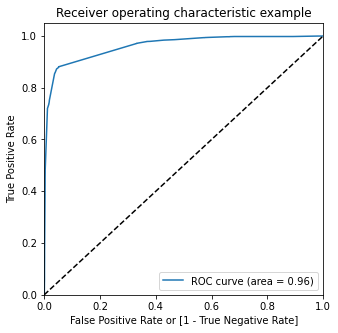

In [761]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

**Area under curve is 96%**

In [766]:
# Parameters
#Accuracy - 96%
#Sensitivity - 86%
#Specificity - 96%
# Area Under Curve - 96%

**Finding the optimal cutoff for prediction**

In [767]:
# Let's create columns with different probability cutoffs for prediction
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.187611,645431,0,1,1,0,0,0,0,0,0,0,0
1,1,0.983498,640120,1,1,1,1,1,1,1,1,1,1,1
2,1,0.992956,626872,1,1,1,1,1,1,1,1,1,1,1
3,0,0.000256,604384,0,1,0,0,0,0,0,0,0,0,0
4,0,0.055753,645291,0,1,0,0,0,0,0,0,0,0,0


In [768]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.383342  1.000000  0.000000
0.1   0.1  0.765178  0.978621  0.632493
0.2   0.2  0.921726  0.881326  0.946840
0.3   0.3  0.922228  0.880890  0.947925
0.4   0.4  0.923733  0.872600  0.955519
0.5   0.5  0.921559  0.856894  0.961758
0.6   0.6  0.921224  0.855585  0.962029
0.7   0.7  0.921224  0.854276  0.962842
0.8   0.8  0.889446  0.738220  0.983455
0.9   0.9  0.885600  0.720768  0.988066


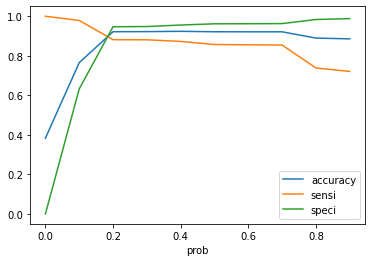

In [769]:
# Now we plot a curve to check the optimal cutoff
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

**Accuracy, sensitivity and specificity lines are intersacting at 0.2. Hence, the optimal cutoff is 0.2**

**Now taking 0.2 cutoff and evaluating the model**

In [771]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.2 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.187611,645431,0,1,1,0,0,0,0,0,0,0,0,0
1,1,0.983498,640120,1,1,1,1,1,1,1,1,1,1,1,1
2,1,0.992956,626872,1,1,1,1,1,1,1,1,1,1,1,1
3,0,0.000256,604384,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.055753,645291,0,1,0,0,0,0,0,0,0,0,0,0


In [773]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3491,  196],
       [ 272, 2020]], dtype=int64)

In [774]:
# ACCURACY
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.921726041144004

In [775]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [776]:
# SENSITIVITY
TP / float(TP+FN)

0.881326352530541

In [777]:
# SPECIFICITY
TN / float(TN+FP)

0.9468402495253594

In [778]:
# Parameters
#Accuracy - 92%
#Sensitivity - 88%
#Specificity - 94%
# Area Under Curve - 96%

**Making Prediction on test data**

In [779]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits',
                                                            'Total Time Spent on Website','Page Views Per Visit']])

In [781]:
X_test = X_test[col1]
X_test.head()

,Do Not Email,Lead Origin_Lead Add Form,Lead Source_Welingak Website,Last Activity_Olark Chat Conversation,Lead Quality_Might be,Lead Quality_Worst,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Last Notable Activity_SMS Sent,Last Notable Activity_Unsubscribed
Lead Number,,,,,,,,,,,,,,
594343,0,0,0,0,1,0,0,0,0,1,0,0,0,0
649401,0,0,0,0,1,0,0,0,0,0,1,0,0,0
626986,0,0,0,0,0,0,0,0,0,0,1,0,1,0
628453,0,0,0,0,0,0,0,0,0,0,1,0,1,0
606663,0,1,0,0,0,0,0,1,0,0,0,0,0,0


In [782]:
X_test_sm = sm.add_constant(X_test)

In [783]:
# Making prediction on the test set:
y_test_pred = res.predict(X_test_sm)

In [784]:
y_test_pred[:10]

Lead Number
594343    0.000253
649401    0.187611
626986    0.992956
628453    0.992956
606663    0.999703
616626    0.992956
607154    0.992956
619952    0.716911
616143    0.393017
607234    0.000253
dtype: float64

In [785]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [787]:
# Let's see the head
y_pred_1.head()

,0
Lead Number,
594343,0.000253
649401,0.187611
626986,0.992956
628453,0.992956
606663,0.999703


In [788]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [789]:
#Putting Lead Number to index
y_test_df['Lead Number'] = y_test_df.index

In [790]:
# Resetting the index of the dataframe to append them side by side 
y_test_df.reset_index(drop=True, inplace=True)
y_pred_1.reset_index(drop=True, inplace=True)

In [791]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [792]:
y_pred_final.head()

,Converted,Lead Number,0
0,0,594343,0.000253
1,1,649401,0.187611
2,1,626986,0.992956
3,1,628453,0.992956
4,1,606663,0.999703


In [794]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})
y_pred_final.head()

,Converted,Lead Number,Converted_Prob
0,0,594343,0.000253
1,1,649401,0.187611
2,1,626986,0.992956
3,1,628453,0.992956
4,1,606663,0.999703


In [795]:
# Creating predicted column with 0.2 probability cutoff
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.2 else 0)
# using 0.2 as it is the optimal cutoff
y_pred_final.head()

In [796]:
#Let's make the confusion matrix
confusion3 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion3

array([[1530,   93],
       [ 119,  821]], dtype=int64)

In [797]:
# ACCURACY
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.9172844323058915

In [798]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [799]:
# SENSITIVITY
TP / float(TP+FN)

0.881326352530541

In [800]:
# SPECIFICITY
TN / float(TN+FP)

0.9468402495253594

**LEAD SCORE Prediction**

In [804]:
# Selecting the test and train dataset along with the Conversion Probability and final predicted value for 'Converted'
leads_test_pred = y_pred_final.copy()
leads_train_pred = y_train_pred_final.copy()
# Dropping all the unwanted columns from train dataset
leads_train_pred = leads_train_pred[['Lead Number','Converted','Converted_Prob','final_predicted']]

In [805]:
# Concatenating the test and train dataset by using the function append
lead_full_pred = leads_train_pred.append(leads_test_pred)
lead_full_pred.head()

,Lead Number,Converted,Converted_Prob,final_predicted
0,645431,0,0.187611,0
1,640120,1,0.983498,1
2,626872,1,0.992956,1
3,604384,0,0.000256,0
4,645291,0,0.055753,0


In [807]:
# Calculating the Lead Score value
# Lead Score = 100 * Conversion_Prob
lead_full_pred['Lead_Score'] = lead_full_pred['Converted_Prob'].apply(lambda x : round(x*100))
lead_full_pred.head(100)

,Lead Number,Converted,Converted_Prob,final_predicted,Lead_Score
0,645431,0,0.187611,0,19
1,640120,1,0.983498,1,98
2,626872,1,0.992956,1,99
3,604384,0,0.000256,0,0
4,645291,0,0.055753,0,6
...,...,...,...,...,...
95,612919,1,0.716911,1,72
96,614566,0,0.013881,0,1
97,659614,0,0.001060,0,0
98,643936,1,0.983498,1,98


**if the lead score is high the chances to convert the lead higher while if the lead score is low the chances to convert the lead is low**